# **Penting**
- Pastikan Anda melakukan Run All sebelum mengirimkan submission untuk memastikan seluruh cell berjalan dengan baik.
- Hapus simbol pagar (#) jika Anda menerapkan kriteria tambahan
- Biarkan simbol pagar (#) jika Anda tidak menerapkan kriteria tambahan

# **INFORMASI DATASET**
## Latar Belakang

Dalam dunia bisnis ritel, pemahaman terhadap perilaku pelanggan menjadi salah satu faktor krusial dalam menentukan strategi pemasaran, peningkatan layanan, serta pengambilan keputusan berbasis data. Salah satu pendekatan yang umum digunakan untuk memahami perilaku pelanggan adalah melalui segmentasi, yaitu proses pengelompokan pelanggan ke dalam beberapa segmen atau kelompok berdasarkan karakteristik tertentu.

Dengan menerapkan metode **unsupervised learning**, khususnya **clustering**, proyek ini bertujuan untuk membentuk segmentasi pelanggan yang merepresentasikan pola-pola pembelian yang serupa. Hasil segmentasi ini diharapkan dapat memberikan insight yang bernilai bagi pihak manajemen, khususnya dalam menyusun strategi promosi yang lebih tepat sasaran, mengembangkan program loyalitas, serta mengoptimalkan layanan pelanggan.

# **1. Import Library**
Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning. Semua library yang dibutuhkan harus **import** di **cell** ini, jika ada library yang dijalankan di cell lain maka **submission langsung ditolak**

In [110]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import LabelEncoder
from yellowbrick.cluster import KElbowVisualizer
import joblib
from sklearn.decomposition import PCA

# **2. Memuat Dataset**
Pada tahap ini, Anda perlu memuat dataset ke dalam notebook lalu mengecek informasi dataset sebelum nantinya dilakukan pembersihan. Hal-hal yang perlu dilakukan pada tahapan ini yaitu:
1. **Memahami Struktur Data**
   - Dataset harus mengambil referensi wajib digunakan (bisa dilihat [Disini](https://drive.google.com/drive/folders/1Zs7VmPZ-jNwsRlMKH65Ea-LApSwx6lKx?usp=drive_link))
   - Melakukan loading dataset ke dalam notebook dan menampilkan 10 baris pertama dengan function `head()`.
   - Tinjau jumlah baris kolom dan jenis data dalam dataset dengan function `info()`.  
   - Menampilkan statistik deskriptif dataset dengan menjalankan `describe()`.
   - Pastikan **setiap function tersebut** memiliki **output pada setiap cell** code. Jika tidak **submission langsung ditolak**
   

Gunakan code ini untuk melakukan load data secara otomatis tanpa harus download data tersebut secara manual:
```python
url='https://drive.google.com/uc?id=1gnLO9qvEPqv1uBt1928AcsCmdvzqjC5m'
df = pd.read_csv(url)
```

In [111]:
url='https://drive.google.com/uc?id=1gnLO9qvEPqv1uBt1928AcsCmdvzqjC5m'
df = pd.read_csv(url)
model_df = df.copy()

In [112]:
# Tampilkan 10 baris pertama dengan function head.
model_df.head(10)

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70.0,Doctor,81.0,1.0,5112.21,2024-11-04 08:08:08
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68.0,Doctor,141.0,1.0,13758.91,2024-11-04 08:09:35
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,19.0,Student,56.0,1.0,1122.35,2024-11-04 08:07:04
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26.0,Student,25.0,1.0,8569.06,2024-11-04 08:09:06
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,NaN,Student,198.0,1.0,7429.40,2024-11-04 08:06:39
5,TX000006,AC00393,92.15,2023-04-03 17:15:01,Debit,Oklahoma City,D000579,117.67.192.211,M054,ATM,18.0,Student,172.0,1.0,781.68,2024-11-04 08:06:36
6,TX000007,AC00199,7.08,2023-02-15 16:36:48,Credit,Seattle,D000241,140.212.253.222,M019,ATM,37.0,Doctor,139.0,1.0,13316.71,2024-11-04 08:10:09
7,TX000008,AC00069,171.42,2023-05-08 17:47:59,Credit,Indianapolis,D000500,92.214.76.157,M020,Branch,67.0,Retired,291.0,1.0,2796.24,2024-11-04 08:10:55
8,TX000009,AC00135,106.23,2023-03-21 16:59:46,Credit,Detroit,D000690,24.148.92.177,M035,Branch,51.0,Engineer,86.0,1.0,9095.14,2024-11-04 08:11:14
9,TX000010,AC00385,815.96,2023-03-31 16:06:57,Debit,Nashville,D000199,32.169.88.41,M007,ATM,55.0,Doctor,120.0,1.0,1021.88,2024-11-04 08:06:32


In [113]:
# Tinjau jumlah baris kolom dan jenis data dalam dataset dengan info.
model_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2537 entries, 0 to 2536
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionID            2508 non-null   object 
 1   AccountID                2516 non-null   object 
 2   TransactionAmount        2511 non-null   float64
 3   TransactionDate          2509 non-null   object 
 4   TransactionType          2507 non-null   object 
 5   Location                 2507 non-null   object 
 6   DeviceID                 2507 non-null   object 
 7   IP Address               2517 non-null   object 
 8   MerchantID               2514 non-null   object 
 9   Channel                  2510 non-null   object 
 10  CustomerAge              2519 non-null   float64
 11  CustomerOccupation       2514 non-null   object 
 12  TransactionDuration      2511 non-null   float64
 13  LoginAttempts            2516 non-null   float64
 14  AccountBalance          

In [114]:
# Menampilkan statistik deskriptif dataset dengan menjalankan describe
model_df.describe()

,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance
count,2511.000000,2519.000000,2511.000000,2516.000000,2510.000000
mean,297.656468,44.678444,119.422939,1.121622,5113.438124
std,292.230367,17.837359,70.078513,0.594469,3897.975861
min,0.260000,18.000000,10.000000,1.000000,101.250000
25%,81.310000,27.000000,63.000000,1.000000,1504.727500
50%,211.360000,45.000000,112.000000,1.000000,4734.110000
75%,413.105000,59.000000,161.000000,1.000000,7672.687500
max,1919.110000,80.000000,300.000000,5.000000,14977.990000


(Opsional) Memuat Dataset dan Melakukan Exploratory Data Analysis (EDA) [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

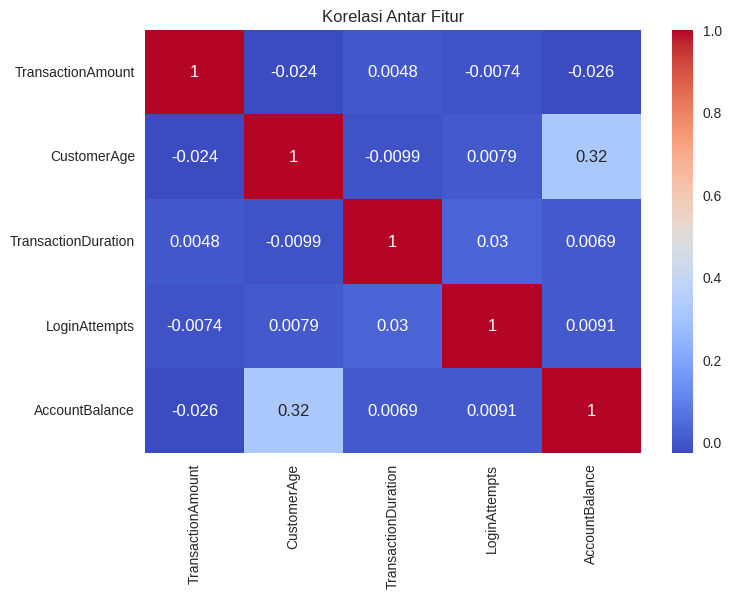

In [115]:
# Menampilkan korelasi antar fitur (Opsional Skilled 1)
numerical_features = model_df.select_dtypes(include=np.number)
corr_matrix = numerical_features.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Korelasi Antar Fitur')
plt.show()

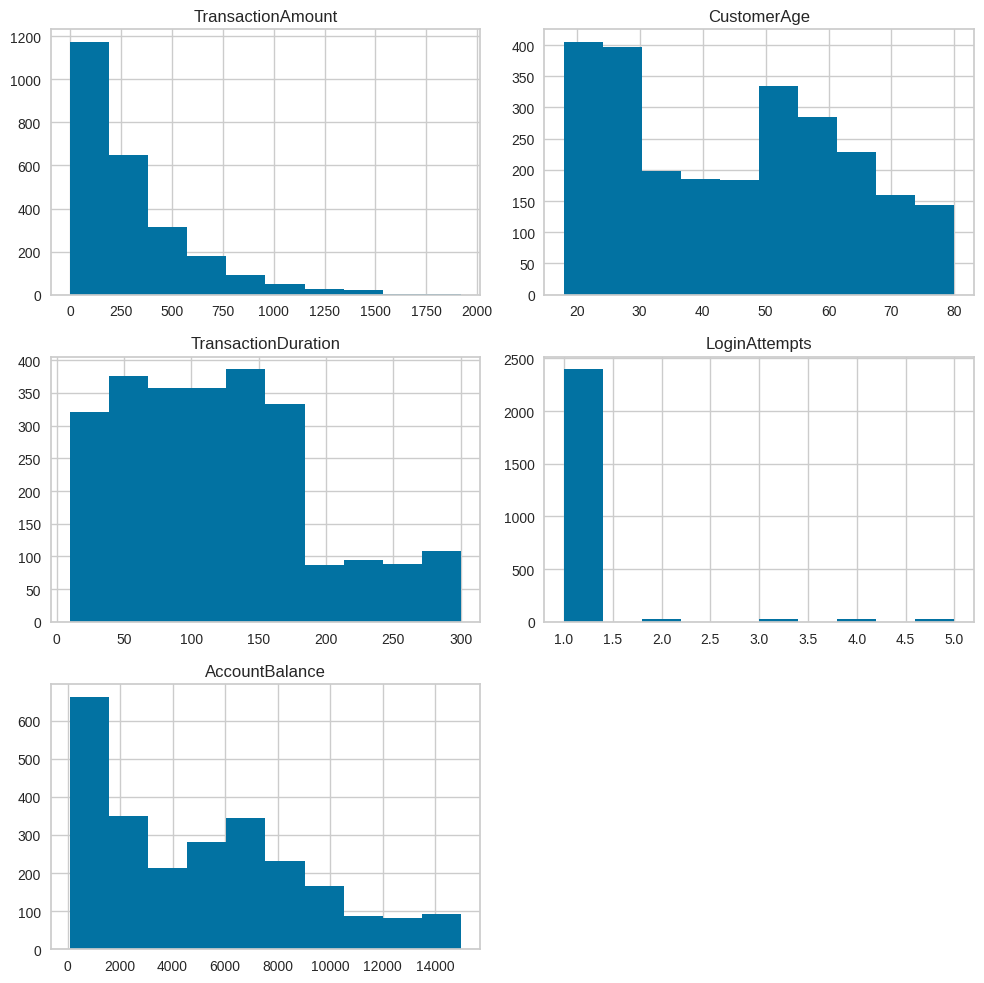

In [116]:
# Menampilkan histogram untuk semua kolom numerik (Opsional Skilled 1)
numerical_features = model_df.select_dtypes(include=np.number)
numerical_features.hist(figsize=(10, 10))
plt.tight_layout()
plt.show()

(Opsional) Memuat Dataset dan Melakukan Exploratory Data Analysis (EDA) [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

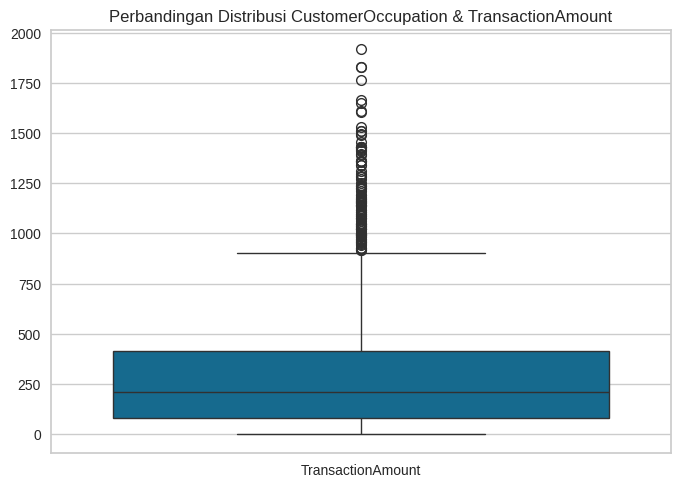

In [117]:
# Visualisasi yang lebih informatif (Opsional Advanced 1)
sns.boxplot(data=model_df[['CustomerOccupation', 'TransactionAmount']])
plt.title('Perbandingan Distribusi CustomerOccupation & TransactionAmount')
plt.show()

# **3. Pembersihan dan Pra Pemrosesan Data**

Pada tahap ini, Anda akan melakukan **Pembersihan Dataset** untuk menjadikan dataset mudah diintepretasi dan bisa dilatih. Hal-hal yang wajib kamu lakukan yaitu:

1. **Mengecek dataset** menggunakan isnull().sum() dan duplicated().sum().
2. Melakukan feature scaling menggunakan `MinMaxScaler()` atau `StandardScalar()` untuk fitur numerik.
3. Melakukan feature encoding menggunakan `pd.get_dummies()` atau `LabelEncoder()` untuk fitur kategorikal.
4. Melakukan drop pada kolom id.
5. **Ketentuan Cell Code**
   - Pastikan **setiap pemeriksaan tersebut** memiliki **output pada cell-nya**. Jika tidak **submission langsung ditolak**


In [118]:
# Mengecek dataset menggunakan isnull().sum()
model_df.isnull().sum()

,0
TransactionID,29
AccountID,21
TransactionAmount,26
TransactionDate,28
TransactionType,30
Location,30
DeviceID,30
IP Address,20
MerchantID,23
Channel,27


In [119]:
# Mengecek dataset menggunakan duplicated().sum()
model_df.duplicated().sum()

np.int64(21)

In [120]:
# Melakukan feature scaling menggunakan MinMaxScaler() atau StandardScalar() untuk fitur numerik.
scaler = StandardScaler()
scaled_data = scaler.fit_transform(model_df.select_dtypes(include=np.number))
scaled_df = pd.DataFrame(scaled_data, columns=model_df.select_dtypes(include=np.number).columns)
model_df[scaled_df.columns] = scaled_df
model_df

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,TX000001,AC00128,-0.970546,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,1.419862,Doctor,-0.548393,-0.204629,-0.000315,2024-11-04 08:08:08
1,TX000002,AC00455,0.268963,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,1.307715,Doctor,0.307960,-0.204629,2.218381,2024-11-04 08:09:35
2,TX000003,AC00019,-0.586526,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,-1.439874,Student,-0.905207,-0.204629,-1.024091,2024-11-04 08:07:04
3,TX000004,AC00070,-0.387294,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,-1.047361,Student,-1.347656,-0.204629,0.886694,2024-11-04 08:09:06
4,TX000005,AC00411,-0.972736,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,NaN,Student,1.121495,-0.204629,0.594263,2024-11-04 08:06:39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2532,TX001046,AC00474,-0.231290,2023-05-01 16:23:40,Debit,Austin,D000045,93.52.44.101,M006,Online,1.924521,Retired,0.065326,-0.204629,-0.166103,2024-11-04 08:11:47
2533,TX001484,AC00198,0.903315,2023-06-23 17:38:26,Debit,Sacramento,D000229,170.154.69.105,M022,Online,1.139496,Doctor,-1.376201,-0.204629,1.702613,2024-11-04 08:06:32
2534,TX000200,AC00358,0.668967,2023-07-31 16:25:26,Debit,Colorado Springs,D000232,35.220.238.127,M022,Branch,0.466617,Retired,1.663852,-0.204629,0.595184,2024-11-04 08:08:01
2535,TX000592,AC00057,-0.338966,2023-05-15 16:19:14,Credit,Tucson,D000378,97.4.209.133,M079,Branch,-0.991288,Student,-0.505576,-0.204629,-1.005175,2024-11-04 08:06:38


In [121]:
# Melakukan feature encoding menggunakan pd.get_dummies() atau LabelEncoder() untuk fitur kategorikal.
pd.get_dummies(model_df.select_dtypes(exclude=np.number))
model_df

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,TX000001,AC00128,-0.970546,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,1.419862,Doctor,-0.548393,-0.204629,-0.000315,2024-11-04 08:08:08
1,TX000002,AC00455,0.268963,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,1.307715,Doctor,0.307960,-0.204629,2.218381,2024-11-04 08:09:35
2,TX000003,AC00019,-0.586526,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,-1.439874,Student,-0.905207,-0.204629,-1.024091,2024-11-04 08:07:04
3,TX000004,AC00070,-0.387294,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,-1.047361,Student,-1.347656,-0.204629,0.886694,2024-11-04 08:09:06
4,TX000005,AC00411,-0.972736,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,NaN,Student,1.121495,-0.204629,0.594263,2024-11-04 08:06:39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2532,TX001046,AC00474,-0.231290,2023-05-01 16:23:40,Debit,Austin,D000045,93.52.44.101,M006,Online,1.924521,Retired,0.065326,-0.204629,-0.166103,2024-11-04 08:11:47
2533,TX001484,AC00198,0.903315,2023-06-23 17:38:26,Debit,Sacramento,D000229,170.154.69.105,M022,Online,1.139496,Doctor,-1.376201,-0.204629,1.702613,2024-11-04 08:06:32
2534,TX000200,AC00358,0.668967,2023-07-31 16:25:26,Debit,Colorado Springs,D000232,35.220.238.127,M022,Branch,0.466617,Retired,1.663852,-0.204629,0.595184,2024-11-04 08:08:01
2535,TX000592,AC00057,-0.338966,2023-05-15 16:19:14,Credit,Tucson,D000378,97.4.209.133,M079,Branch,-0.991288,Student,-0.505576,-0.204629,-1.005175,2024-11-04 08:06:38


In [122]:
# Melakukan drop pada kolom yang memiliki keterangan id
model_df = model_df.drop(columns=['TransactionID','AccountID','DeviceID','MerchantID'])
model_df

,TransactionAmount,TransactionDate,TransactionType,Location,IP Address,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,-0.970546,2023-04-11 16:29:14,Debit,San Diego,162.198.218.92,ATM,1.419862,Doctor,-0.548393,-0.204629,-0.000315,2024-11-04 08:08:08
1,0.268963,2023-06-27 16:44:19,Debit,Houston,13.149.61.4,ATM,1.307715,Doctor,0.307960,-0.204629,2.218381,2024-11-04 08:09:35
2,-0.586526,2023-07-10 18:16:08,Debit,Mesa,215.97.143.157,Online,-1.439874,Student,-0.905207,-0.204629,-1.024091,2024-11-04 08:07:04
3,-0.387294,2023-05-05 16:32:11,Debit,Raleigh,200.13.225.150,Online,-1.047361,Student,-1.347656,-0.204629,0.886694,2024-11-04 08:09:06
4,-0.972736,2023-10-16 17:51:24,Credit,Atlanta,65.164.3.100,Online,NaN,Student,1.121495,-0.204629,0.594263,2024-11-04 08:06:39
...,...,...,...,...,...,...,...,...,...,...,...,...
2532,-0.231290,2023-05-01 16:23:40,Debit,Austin,93.52.44.101,Online,1.924521,Retired,0.065326,-0.204629,-0.166103,2024-11-04 08:11:47
2533,0.903315,2023-06-23 17:38:26,Debit,Sacramento,170.154.69.105,Online,1.139496,Doctor,-1.376201,-0.204629,1.702613,2024-11-04 08:06:32
2534,0.668967,2023-07-31 16:25:26,Debit,Colorado Springs,35.220.238.127,Branch,0.466617,Retired,1.663852,-0.204629,0.595184,2024-11-04 08:08:01
2535,-0.338966,2023-05-15 16:19:14,Credit,Tucson,97.4.209.133,Branch,-0.991288,Student,-0.505576,-0.204629,-1.005175,2024-11-04 08:06:38


(Opsional) Pembersihan dan Pra Pemrosesan Data [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

In [123]:
# Menangani data yang hilang (bisa menggunakan dropna() atau metode imputasi fillna()).
model_df = model_df.dropna()
model_df

,TransactionAmount,TransactionDate,TransactionType,Location,IP Address,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,-0.970546,2023-04-11 16:29:14,Debit,San Diego,162.198.218.92,ATM,1.419862,Doctor,-0.548393,-0.204629,-0.000315,2024-11-04 08:08:08
1,0.268963,2023-06-27 16:44:19,Debit,Houston,13.149.61.4,ATM,1.307715,Doctor,0.307960,-0.204629,2.218381,2024-11-04 08:09:35
2,-0.586526,2023-07-10 18:16:08,Debit,Mesa,215.97.143.157,Online,-1.439874,Student,-0.905207,-0.204629,-1.024091,2024-11-04 08:07:04
3,-0.387294,2023-05-05 16:32:11,Debit,Raleigh,200.13.225.150,Online,-1.047361,Student,-1.347656,-0.204629,0.886694,2024-11-04 08:09:06
5,-0.703375,2023-04-03 17:15:01,Debit,Oklahoma City,117.67.192.211,ATM,-1.495947,Student,0.750409,-0.204629,-1.111505,2024-11-04 08:06:36
...,...,...,...,...,...,...,...,...,...,...,...,...
2532,-0.231290,2023-05-01 16:23:40,Debit,Austin,93.52.44.101,Online,1.924521,Retired,0.065326,-0.204629,-0.166103,2024-11-04 08:11:47
2533,0.903315,2023-06-23 17:38:26,Debit,Sacramento,170.154.69.105,Online,1.139496,Doctor,-1.376201,-0.204629,1.702613,2024-11-04 08:06:32
2534,0.668967,2023-07-31 16:25:26,Debit,Colorado Springs,35.220.238.127,Branch,0.466617,Retired,1.663852,-0.204629,0.595184,2024-11-04 08:08:01
2535,-0.338966,2023-05-15 16:19:14,Credit,Tucson,97.4.209.133,Branch,-0.991288,Student,-0.505576,-0.204629,-1.005175,2024-11-04 08:06:38


In [124]:
# Menghapus data duplikat menggunakan drop_duplicates().
model_df = model_df.drop_duplicates()
model_df

,TransactionAmount,TransactionDate,TransactionType,Location,IP Address,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,-0.970546,2023-04-11 16:29:14,Debit,San Diego,162.198.218.92,ATM,1.419862,Doctor,-0.548393,-0.204629,-0.000315,2024-11-04 08:08:08
1,0.268963,2023-06-27 16:44:19,Debit,Houston,13.149.61.4,ATM,1.307715,Doctor,0.307960,-0.204629,2.218381,2024-11-04 08:09:35
2,-0.586526,2023-07-10 18:16:08,Debit,Mesa,215.97.143.157,Online,-1.439874,Student,-0.905207,-0.204629,-1.024091,2024-11-04 08:07:04
3,-0.387294,2023-05-05 16:32:11,Debit,Raleigh,200.13.225.150,Online,-1.047361,Student,-1.347656,-0.204629,0.886694,2024-11-04 08:09:06
5,-0.703375,2023-04-03 17:15:01,Debit,Oklahoma City,117.67.192.211,ATM,-1.495947,Student,0.750409,-0.204629,-1.111505,2024-11-04 08:06:36
...,...,...,...,...,...,...,...,...,...,...,...,...
2510,-0.382263,2023-02-24 16:24:46,Debit,Denver,21.190.11.223,Online,-1.215581,Student,-1.433292,-0.204629,-0.856135,2024-11-04 08:12:22
2511,-0.186796,2023-02-14 16:21:23,Credit,Jacksonville,59.127.135.25,Online,-1.159507,Student,-0.377123,-0.204629,-1.278402,2024-11-04 08:07:49
2523,-0.977083,2023-04-20 18:50:39,Debit,New York,190.152.148.249,Branch,1.756301,Retired,-0.605484,-0.204629,-0.052396,2024-11-04 08:07:37
2524,-0.224308,2023-12-28 17:31:03,Debit,Omaha,156.173.170.140,ATM,-0.430555,Engineer,-0.976570,-0.204629,0.404504,2024-11-04 08:09:17


(Opsional) Pembersihan dan Pra Pemrosesan Data [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

In [125]:
# Melakukan Handling Outlier Data berdasarkan jumlah outlier, apakah menggunakan metode drop atau mengisi nilai tersebut.
numerical_cols = model_df.select_dtypes(include=np.number).columns

Q1 = model_df[numerical_cols].quantile(0.25)
Q3 = model_df[numerical_cols].quantile(0.75)
IQR = Q3 - Q1

condition = ~((model_df[numerical_cols] < (Q1 - 1.5 * IQR)) |
              (model_df[numerical_cols] > (Q3 + 1.5 * IQR))).any(axis=1)

model_df = model_df[condition].reset_index(drop=True)
model_df

,TransactionAmount,TransactionDate,TransactionType,Location,IP Address,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,-0.970546,2023-04-11 16:29:14,Debit,San Diego,162.198.218.92,ATM,1.419862,Doctor,-0.548393,-0.204629,-0.000315,2024-11-04 08:08:08
1,0.268963,2023-06-27 16:44:19,Debit,Houston,13.149.61.4,ATM,1.307715,Doctor,0.307960,-0.204629,2.218381,2024-11-04 08:09:35
2,-0.586526,2023-07-10 18:16:08,Debit,Mesa,215.97.143.157,Online,-1.439874,Student,-0.905207,-0.204629,-1.024091,2024-11-04 08:07:04
3,-0.387294,2023-05-05 16:32:11,Debit,Raleigh,200.13.225.150,Online,-1.047361,Student,-1.347656,-0.204629,0.886694,2024-11-04 08:09:06
4,-0.703375,2023-04-03 17:15:01,Debit,Oklahoma City,117.67.192.211,ATM,-1.495947,Student,0.750409,-0.204629,-1.111505,2024-11-04 08:06:36
...,...,...,...,...,...,...,...,...,...,...,...,...
2019,-0.382263,2023-02-24 16:24:46,Debit,Denver,21.190.11.223,Online,-1.215581,Student,-1.433292,-0.204629,-0.856135,2024-11-04 08:12:22
2020,-0.186796,2023-02-14 16:21:23,Credit,Jacksonville,59.127.135.25,Online,-1.159507,Student,-0.377123,-0.204629,-1.278402,2024-11-04 08:07:49
2021,-0.977083,2023-04-20 18:50:39,Debit,New York,190.152.148.249,Branch,1.756301,Retired,-0.605484,-0.204629,-0.052396,2024-11-04 08:07:37
2022,-0.224308,2023-12-28 17:31:03,Debit,Omaha,156.173.170.140,ATM,-0.430555,Engineer,-0.976570,-0.204629,0.404504,2024-11-04 08:09:17


In [126]:
# Melakukan binning data berdasarkan kondisi rentang nilai pada fitur numerik,
# lakukan pada satu sampai dua fitur numerik.
# Silahkan lakukan encode hasil binning tersebut menggunakan LabelEncoder atau get_dummies.
model_df['TransactionAmount_Binned'] = pd.cut(model_df['TransactionAmount'], bins=[0, 1000, 5000, 10000, float('inf')], labels=['Low', 'Medium', 'High', 'Very High'])
model_df['CustomerAge_Binned'] = pd.cut(model_df['CustomerAge'], bins=[0, 25, 40, 60, float('inf')], labels=['Young', 'Adult', 'Middle-Aged', 'Senior'])

encoder_amount = LabelEncoder()
encoder_age = LabelEncoder()

model_df['TransactionAmount_Encoded'] = encoder_amount.fit_transform(model_df['TransactionAmount_Binned'])
model_df['CustomerAge_Encoded'] = encoder_age.fit_transform(model_df['CustomerAge_Binned'])

model_df.head()


,TransactionAmount,TransactionDate,TransactionType,Location,IP Address,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate,TransactionAmount_Binned,CustomerAge_Binned,TransactionAmount_Encoded,CustomerAge_Encoded
0,-0.970546,2023-04-11 16:29:14,Debit,San Diego,162.198.218.92,ATM,1.419862,Doctor,-0.548393,-0.204629,-0.000315,2024-11-04 08:08:08,NaN,Young,1,0
1,0.268963,2023-06-27 16:44:19,Debit,Houston,13.149.61.4,ATM,1.307715,Doctor,0.307960,-0.204629,2.218381,2024-11-04 08:09:35,Low,Young,0,0
2,-0.586526,2023-07-10 18:16:08,Debit,Mesa,215.97.143.157,Online,-1.439874,Student,-0.905207,-0.204629,-1.024091,2024-11-04 08:07:04,NaN,NaN,1,1
3,-0.387294,2023-05-05 16:32:11,Debit,Raleigh,200.13.225.150,Online,-1.047361,Student,-1.347656,-0.204629,0.886694,2024-11-04 08:09:06,NaN,NaN,1,1
4,-0.703375,2023-04-03 17:15:01,Debit,Oklahoma City,117.67.192.211,ATM,-1.495947,Student,0.750409,-0.204629,-1.111505,2024-11-04 08:06:36,NaN,NaN,1,1


# **4. Membangun Model Clustering**
Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan.
1. Melakukan visualisasi Elbow Method untuk menentukan jumlah cluster terbaik menggunakan `KElbowVisualizer()`.
2. Menggunakan algoritma K-Means Clustering dengan `sklearn.cluster.KMeans()`.
3. Jalankan cell code `joblib.dump(model_kmeans, "best_model_clustering.h5")` untuk menyimpan model yang sudah dibuat.

In [127]:
# Gunakan describe untuk memastikan proses clustering menggunakan dataset hasil preprocessing
# Lengkapi kode ini dengan mengubah nama DataFrame yang akan dilatih.
# Kode harus digunakan dan dilarang menambahkan syntax lainnya pada cell ini.
# ___.describe()
model_df.describe()

,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance,TransactionAmount_Encoded,CustomerAge_Encoded
count,2024.000000,2024.000000,2024.000000,2.024000e+03,2024.000000,2024.000000,2024.000000
mean,-0.143860,-0.007097,-0.006354,-2.046294e-01,-0.003207,0.653656,0.497530
std,0.745228,0.995434,1.008092,7.273758e-15,1.000827,0.475922,0.500117
min,-1.017881,-1.495947,-1.561745,-2.046294e-01,-1.285856,0.000000,0.000000
25%,-0.750847,-0.991288,-0.805299,-2.046294e-01,-0.930350,0.000000,0.000000
50%,-0.337477,0.018031,-0.134489,-2.046294e-01,-0.105089,1.000000,0.000000
75%,0.261699,0.803056,0.596979,-2.046294e-01,0.653337,1.000000,1.000000
max,2.072523,1.980594,2.577295,-2.046294e-01,2.531190,1.000000,1.000000


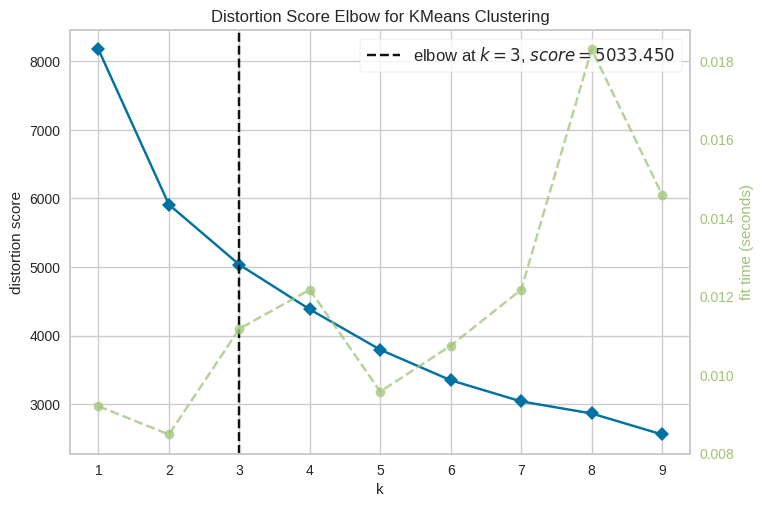

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [128]:
# Melakukan visualisasi Elbow Method menggunakan KElbowVisualizer()
kmeans_model = KMeans()
numerical_df = model_df.select_dtypes(include=np.number)
visualizer = KElbowVisualizer(kmeans_model, k=(1, 10))
visualizer.fit(numerical_df)
visualizer.show()

In [129]:
# Menggunakan algoritma K-Means Clustering
model_df['Cluster'] = KMeans(n_clusters=3, random_state=42).fit_predict(numerical_df)
model_df

,TransactionAmount,TransactionDate,TransactionType,Location,IP Address,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate,TransactionAmount_Binned,CustomerAge_Binned,TransactionAmount_Encoded,CustomerAge_Encoded,Cluster
0,-0.970546,2023-04-11 16:29:14,Debit,San Diego,162.198.218.92,ATM,1.419862,Doctor,-0.548393,-0.204629,-0.000315,2024-11-04 08:08:08,NaN,Young,1,0,0
1,0.268963,2023-06-27 16:44:19,Debit,Houston,13.149.61.4,ATM,1.307715,Doctor,0.307960,-0.204629,2.218381,2024-11-04 08:09:35,Low,Young,0,0,1
2,-0.586526,2023-07-10 18:16:08,Debit,Mesa,215.97.143.157,Online,-1.439874,Student,-0.905207,-0.204629,-1.024091,2024-11-04 08:07:04,NaN,NaN,1,1,2
3,-0.387294,2023-05-05 16:32:11,Debit,Raleigh,200.13.225.150,Online,-1.047361,Student,-1.347656,-0.204629,0.886694,2024-11-04 08:09:06,NaN,NaN,1,1,1
4,-0.703375,2023-04-03 17:15:01,Debit,Oklahoma City,117.67.192.211,ATM,-1.495947,Student,0.750409,-0.204629,-1.111505,2024-11-04 08:06:36,NaN,NaN,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019,-0.382263,2023-02-24 16:24:46,Debit,Denver,21.190.11.223,Online,-1.215581,Student,-1.433292,-0.204629,-0.856135,2024-11-04 08:12:22,NaN,NaN,1,1,2
2020,-0.186796,2023-02-14 16:21:23,Credit,Jacksonville,59.127.135.25,Online,-1.159507,Student,-0.377123,-0.204629,-1.278402,2024-11-04 08:07:49,NaN,NaN,1,1,2
2021,-0.977083,2023-04-20 18:50:39,Debit,New York,190.152.148.249,Branch,1.756301,Retired,-0.605484,-0.204629,-0.052396,2024-11-04 08:07:37,NaN,Young,1,0,0
2022,-0.224308,2023-12-28 17:31:03,Debit,Omaha,156.173.170.140,ATM,-0.430555,Engineer,-0.976570,-0.204629,0.404504,2024-11-04 08:09:17,NaN,NaN,1,1,1


Jalankan cell code ini untuk menyimpan model kamu.

In [130]:
# Menyimpan model menggunakan joblib
# import joblib
# joblib.dump(___, "model_clustering.h5")
joblib.dump(kmeans_model, "model_clustering.h5")

['model_clustering.h5']

(Opsional) Membangun Model Clustering [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

In [131]:
# Menghitung dan menampilkan nilai Silhouette Score.
kmeans_model = KMeans(n_clusters=3, random_state=42)
kmeans_model.fit(numerical_df)
labels = kmeans_model.labels_
silhouette_avg = silhouette_score(numerical_df, labels)
print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.2584722839814371


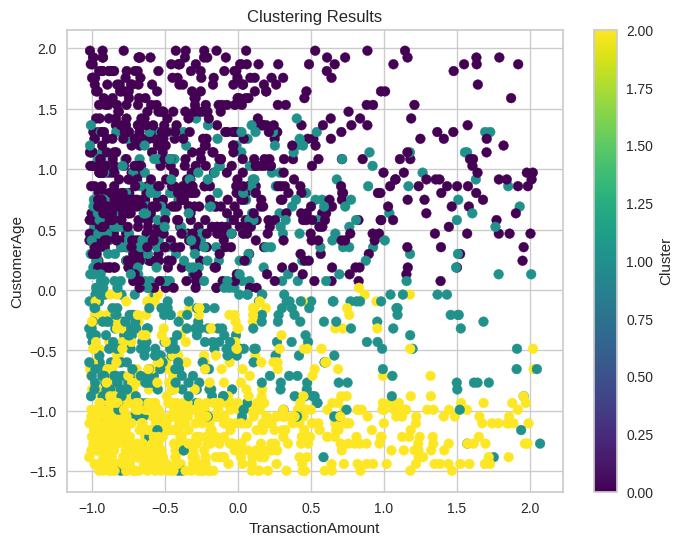

In [132]:
# Membuat visualisasi hasil clustering
plt.figure(figsize=(8, 6))
plt.scatter(numerical_df['TransactionAmount'], numerical_df['CustomerAge'], c=model_df['Cluster'], cmap='viridis')
plt.xlabel('TransactionAmount')
plt.ylabel('CustomerAge')
plt.title('Clustering Results')
plt.colorbar(label='Cluster')
plt.show()

(Opsional) Membangun Model Clustering [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

In [133]:
# Membangun model menggunakan PCA.
pca = PCA(n_components=3)
pca_result = pca.fit_transform(numerical_df)

In [134]:
# Simpan model PCA sebagai perbandingan dengan menjalankan cell code ini joblib.dump(model,"PCA_model_clustering.h5")
# joblib.dump(___, "PCA_model_clustering.h5")
joblib.dump(pca, "PCA_model_clustering.h5")

['PCA_model_clustering.h5']

# **5. Interpretasi Cluster**

## **a. Interpretasi Hasil Clustering**
1. **Contoh Interpretasi:**
- **Cluster 1: (Nasabah Bertransaksi dan Pendapatan Besar)**:
  - **Rata-rata (mean) Annual Income:** 0.953 (48,260)
  - **Rata-rata (mean) Spending Score:** 0.8 (56.48)
  - **Analisis:** Cluster ini mencakup pelanggan dengan pendapatan tahunan tinggi dan tingkat pengeluaran yang cukup tinggi. Pelanggan dalam cluster ini cenderung memiliki daya beli yang tinggi dan mereka lebih cenderung untuk membelanjakan sebagian besar pendapatan mereka. Sehingga rekomendasi pada kelompok nasabah ini adalah dengan menawarkan produk-produk investasi atau perbankan yang berkualitas tinggi.


In [135]:
# Menampilkan analisis deskriptif minimal mean, min dan max untuk fitur numerik dan modus untuk fitur kategorikal.
cluster_analysis = model_df.groupby('Cluster').agg({
    'TransactionAmount': ['mean', 'min', 'max'],
    'CustomerAge': ['mean', 'min', 'max'],
    'TransactionDuration': ['mean', 'min', 'max'],
    'LoginAttempts': ['mean', 'min', 'max'],
    'AccountBalance': ['mean', 'min', 'max'],
    'TransactionType': lambda x: x.mode()[0],
    'Location': lambda x: x.mode()[0],
    'Channel': lambda x: x.mode()[0],
    'CustomerOccupation': lambda x: x.mode()[0]
})

print(cluster_analysis)

        TransactionAmount                     CustomerAge                      \
                     mean       min       max        mean       min       max   
Cluster                                                                         
0               -0.160972 -1.015896  2.022484    0.955128  0.018031  1.980594   
1               -0.145958 -1.017676  2.072523   -0.010907 -1.495947  1.419862   
2               -0.123877 -1.017881  2.028200   -1.034354 -1.495947  0.018031   

        TransactionDuration                     LoginAttempts            \
                       mean       min       max          mean       min   
Cluster                                                                   
0                 -0.072912 -1.561745  2.563023     -0.204629 -0.204629   
1                  0.043943 -1.561745  2.577295     -0.204629 -0.204629   
2                  0.025072 -1.561745  2.563023     -0.204629 -0.204629   

                  AccountBalance                     Transacti

## Menjelaskan karakteristik tiap cluster berdasarkan rentangnya.

### **Cluster 0: (Indianapolis, ATM, Retired)**

**Rata-rata (mean):**

* **TransactionAmount:** -0.160972
* **CustomerAge:** 0.955128 (paling tua)
* **TransactionDuration:** -0.072912
* **LoginAttempts:** -0.204629
* **AccountBalance:** -0.153674
* **TransactionType:** Debit
* **Location:** Indianapolis
* **Channel:** ATM
* **CustomerOccupation:** Retired

**Analisis:**
Cluster ini berisi nasabah **pensiunan** dengan **usia paling tua**. Mereka memiliki **saldo dan jumlah transaksi yang rendah**, serta melakukan transaksi terutama melalui **ATM**. Aktivitas login hampir tidak ada, kemungkinan karena tidak terbiasa menggunakan layanan digital.

---

### **Cluster 1: (San Jose, Branch, Doctor)**

**Rata-rata (mean):**

* **TransactionAmount:** -0.145958
* **CustomerAge:** -0.010907 (usia menengah)
* **TransactionDuration:** 0.043943
* **LoginAttempts:** -0.204629
* **AccountBalance:** 1.263205 (tertinggi)
* **TransactionType:** Debit
* **Location:** San Jose
* **Channel:** Branch
* **CustomerOccupation:** Doctor

**Analisis:**
Cluster ini terdiri dari nasabah usia menengah (kemungkinan produktif), mayoritas **berprofesi sebagai dokter**. Mereka memiliki **saldo akun tertinggi**, meskipun **jumlah transaksi relatif kecil**. Sering bertransaksi langsung di **cabang (Branch)** dan cenderung tidak login, kemungkinan karena lebih suka layanan tatap muka.

---

### **Cluster 2: (Seattle, Branch, Student)**

**Rata-rata (mean):**

* **TransactionAmount:** -0.123877
* **CustomerAge:** -1.034354 (paling muda)
* **TransactionDuration:** 0.025072
* **LoginAttempts:** -0.204629
* **AccountBalance:** -0.845199 (terendah)
* **TransactionType:** Debit
* **Location:** Seattle
* **Channel:** Branch
* **CustomerOccupation:** Student

**Analisis:**
Cluster ini mewakili **nasabah muda (mahasiswa)** dengan **saldo akun paling rendah**. Nominal transaksi juga kecil, dan mereka lebih sering datang langsung ke **cabang bank**, mungkin karena belum familiar dengan layanan digital. Tidak menunjukkan aktivitas login juga.


# **6. Mengeksport Data**

1. Simpan nama kolom hasil clustering dengan nama `Target`.
2. Simpan hasilnya ke dalam file CSV menggunakan function `to_csv()`.

In [136]:
# Pastikan nama kolom clustering sudah diubah menjadi Target
model_df = model_df.rename(columns={'Cluster': 'Target'})

In [137]:
# Simpan Data
# ___.to_csv('data_clustering.csv', index=False)
model_df.to_csv('data_clustering.csv', index=False)

(Opsional) Interpretasi Hasil Clustering [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

In [138]:
# inverse dataset ke rentang normal
model_df_inverse = scaler.inverse_transform(scaled_data)
model_df_inverse = pd.DataFrame(model_df_inverse, columns=scaled_df.columns)
model_df_inverse

,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance
0,14.09,70.0,81.0,1.0,5112.21
1,376.24,68.0,141.0,1.0,13758.91
2,126.29,19.0,56.0,1.0,1122.35
3,184.50,26.0,25.0,1.0,8569.06
4,13.45,NaN,198.0,1.0,7429.40
...,...,...,...,...,...
2532,230.08,79.0,124.0,1.0,4466.10
2533,561.58,65.0,23.0,1.0,11748.86
2534,493.11,53.0,236.0,1.0,7432.99
2535,198.62,27.0,84.0,1.0,1196.07


In [139]:
# Menampilkan analisis deskriptif setelah inverse transform
cluster_analysis_inversed = model_df_inverse.groupby(model_df['Target'].reset_index(drop=True).loc[model_df.index]).agg({
    'TransactionAmount': ['mean', 'min', 'max'],
    'CustomerAge': ['mean', 'min', 'max'],
    'TransactionDuration': ['mean', 'min', 'max'],
    'LoginAttempts': ['mean', 'min', 'max'],
    'AccountBalance': ['mean', 'min', 'max']
})

print(cluster_analysis_inversed)

       TransactionAmount                CustomerAge              \
                    mean   min      max        mean   min   max   
Target                                                            
0.0           297.069425  0.26  1830.00   45.349734  18.0  80.0   
1.0           300.764188  0.86  1919.11   45.208929  18.0  80.0   
2.0           284.574379  1.21  1831.02   44.508596  18.0  80.0   

       TransactionDuration              LoginAttempts            \
                      mean   min    max          mean  min  max   
Target                                                            
0.0             125.092369  10.0  300.0      1.133156  1.0  5.0   
1.0             121.897297  11.0  299.0      1.129730  1.0  5.0   
2.0             117.731812  10.0  294.0      1.117143  1.0  5.0   

       AccountBalance                    
                 mean     min       max  
Target                                   
0.0       5286.922901  105.01  14928.35  
1.0       4729.293623  112

## Menjelaskan Karakteristik Tiap Cluster Berdasarkan Rentang Nilai Setelah Inverse

### **Cluster 0:**

* **TransactionAmount**
  Rata-rata: 297.07 | Min: 0.26 | Max: 1830.00
* **CustomerAge**
  Rata-rata: 45.35 | Min: 18.00 | Max: 80.00
* **AccountBalance**
  Rata-rata: 5286.92 | Min: 105.01 | Max: 14,928.35

**Analisis:**
Cluster ini mencerminkan kelompok pelanggan dengan usia rata-rata paruh baya dan saldo akun yang relatif tinggi. Nilai transaksi bervariasi cukup besar, namun cenderung berada di tengah. Karakteristik ini mengindikasikan kelompok pelanggan yang stabil secara finansial dengan aktivitas transaksi yang moderat hingga tinggi.

---

### **Cluster 1:**

* **TransactionAmount**
  Rata-rata: 300.76 | Min: 0.86 | Max: 1919.11
* **CustomerAge**
  Rata-rata: 45.21 | Min: 18.00 | Max: 80.00
* **AccountBalance**
  Rata-rata: 4729.29 | Min: 112.76 | Max: 14,935.50

**Analisis:**
Kelompok ini memiliki karakteristik usia yang hampir sama dengan Cluster 0, namun dengan rata-rata saldo yang sedikit lebih rendah. Transaksi juga cenderung berada di kisaran menengah. Cluster ini dapat mencerminkan pelanggan aktif dengan tingkat keuangan yang cukup baik namun sedikit di bawah Cluster 0.

---

### **Cluster 2:**

* **TransactionAmount**
  Rata-rata: 284.57 | Min: 1.21 | Max: 1831.02
* **CustomerAge**
  Rata-rata: 44.51 | Min: 18.00 | Max: 80.00
* **AccountBalance**
  Rata-rata: 5148.42 | Min: 130.76 | Max: 14,977.99

**Analisis:**
Cluster ini memiliki usia dan nilai transaksi yang mirip dengan dua cluster lainnya, namun menonjol dari sisi rata-rata saldo yang cukup tinggi. Ini bisa menunjukkan kelompok pelanggan dengan tingkat keuangan yang lebih kuat meskipun nilai transaksi tidak jauh berbeda dari cluster lain.

(Opsional) Interpretasi Hasil Clustering [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

In [140]:
# Mengintegrasikan kembali data yang telah di-inverse dengan hasil cluster.
non_numeric_data = model_df.select_dtypes(exclude='number').reset_index(drop=True)
final_df = pd.concat([model_df_inverse.reset_index(drop=True), non_numeric_data], axis=1)

# Menambahkan kolom 'Target' ke final_df
final_df['Target'] = model_df['Target']

final_df

,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance,TransactionDate,TransactionType,Location,IP Address,Channel,CustomerOccupation,PreviousTransactionDate,TransactionAmount_Binned,CustomerAge_Binned,Target
0,14.09,70.0,81.0,1.0,5112.21,2023-04-11 16:29:14,Debit,San Diego,162.198.218.92,ATM,Doctor,2024-11-04 08:08:08,NaN,Young,0.0
1,376.24,68.0,141.0,1.0,13758.91,2023-06-27 16:44:19,Debit,Houston,13.149.61.4,ATM,Doctor,2024-11-04 08:09:35,Low,Young,1.0
2,126.29,19.0,56.0,1.0,1122.35,2023-07-10 18:16:08,Debit,Mesa,215.97.143.157,Online,Student,2024-11-04 08:07:04,NaN,NaN,2.0
3,184.50,26.0,25.0,1.0,8569.06,2023-05-05 16:32:11,Debit,Raleigh,200.13.225.150,Online,Student,2024-11-04 08:09:06,NaN,NaN,1.0
4,13.45,NaN,198.0,1.0,7429.40,2023-04-03 17:15:01,Debit,Oklahoma City,117.67.192.211,ATM,Student,2024-11-04 08:06:36,NaN,NaN,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2532,230.08,79.0,124.0,1.0,4466.10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2533,561.58,65.0,23.0,1.0,11748.86,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2534,493.11,53.0,236.0,1.0,7432.99,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2535,198.62,27.0,84.0,1.0,1196.07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [141]:
final_df = final_df.isna().sum()
final_df

,0
TransactionAmount,26
CustomerAge,18
TransactionDuration,26
LoginAttempts,21
AccountBalance,27
TransactionDate,513
TransactionType,513
Location,513
IP Address,513
Channel,513


In [142]:
final_df = final_df.dropna()
final_df

,0
TransactionAmount,26
CustomerAge,18
TransactionDuration,26
LoginAttempts,21
AccountBalance,27
TransactionDate,513
TransactionType,513
Location,513
IP Address,513
Channel,513


In [143]:
# Simpan Data
# ___.to_csv('data_clustering_inverse.csv', index=False)
final_df.to_csv('data_clustering_inverse.csv', index=False)